In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import duckdb
import os

sns.set(style='whitegrid', palette='muted')  

# 1. load
df = pd.read_csv('C:/Users/Bhavana Reddy/Desktop/retail-kpi-cohort/retail_sales_dataset.csv', parse_dates=['Date'])  

# 2. quick look
df.info()
df.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 70.4+ KB


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [2]:
df.shape, df.columns.tolist()

((1000, 9),
 ['Transaction ID',
  'Date',
  'Customer ID',
  'Gender',
  'Age',
  'Product Category',
  'Quantity',
  'Price per Unit',
  'Total Amount'])

# EDA

In [5]:
df.isnull().count()

Transaction ID      1000
Date                1000
Customer ID         1000
Gender              1000
Age                 1000
Product Category    1000
Quantity            1000
Price per Unit      1000
Total Amount        1000
order_date          1000
order_month         1000
dtype: int64

In [71]:
df.dtypes

Transaction ID               int64
Date                datetime64[ns]
Customer ID                 object
Gender                      object
Age                          int64
Product Category            object
Quantity                     int64
Price per Unit               int64
Total Amount                 int64
dtype: object

In [7]:
df.describe()

,Transaction ID,Date,Age,Quantity,Price per Unit,Total Amount,order_month
count,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.000000,1000
mean,500.500000,2023-07-03 00:25:55.200000256,41.39200,2.514000,179.890000,456.000000,2023-06-18 16:59:31.200000
min,1.000000,2023-01-01 00:00:00,18.00000,1.000000,25.000000,25.000000,2023-01-01 00:00:00
25%,250.750000,2023-04-08 00:00:00,29.00000,1.000000,30.000000,60.000000,2023-04-01 00:00:00
50%,500.500000,2023-06-29 12:00:00,42.00000,3.000000,50.000000,135.000000,2023-06-01 00:00:00
75%,750.250000,2023-10-04 00:00:00,53.00000,4.000000,300.000000,900.000000,2023-10-01 00:00:00
max,1000.000000,2024-01-01 00:00:00,64.00000,4.000000,500.000000,2000.000000,2024-01-01 00:00:00
std,288.819436,NaN,13.68143,1.132734,189.681356,559.997632,NaN


In [ ]:
df['order_month'] = df['date'].dt.to_period('M').dt.to_timestamp()

In [10]:
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,order_date,order_month
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,2023-11-24,2023-11-01
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2023-02-27,2023-02-01
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,2023-01-13,2023-01-01
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,2023-05-21,2023-05-01
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,2023-05-06,2023-05-01
...,...,...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50,2023-05-16,2023-05-01
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90,2023-11-17,2023-11-01
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100,2023-10-29,2023-10-01
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150,2023-12-05,2023-12-01


# KPI with pandas

In [8]:
# KPIs
total_revenue = df['Total Amount'].sum()
total_orders = df['Transaction ID'].nunique()
total_customers = df['Customer ID'].nunique()
aov = total_revenue / total_orders

print(f"Total revenue: ${total_revenue:,.2f}")
print(f"Total orders: {total_orders}")
print(f"Total customers: {total_customers}")
print(f"AOV: ${aov:,.2f}")


Total revenue: $456,000.00
Total orders: 1000
Total customers: 1000
AOV: $456.00


# Monthly revenue chart

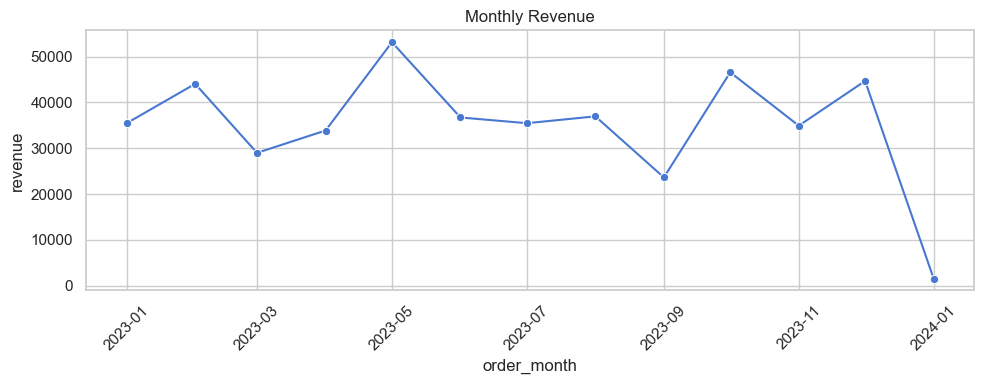

In [11]:
# monthly revenue plot
monthly = df.groupby('order_month').agg(revenue=('Total Amount','sum')).reset_index()
plt.figure(figsize=(10,4))
sns.lineplot(x='order_month', y='revenue', data=monthly, marker='o')
plt.xticks(rotation=45)
plt.title('Monthly Revenue')
plt.tight_layout()
plt.savefig('C:/Users/Bhavana Reddy/Desktop/retail-kpi-cohort/results/charts/monthly_revenue.png', dpi=150)
plt.show()


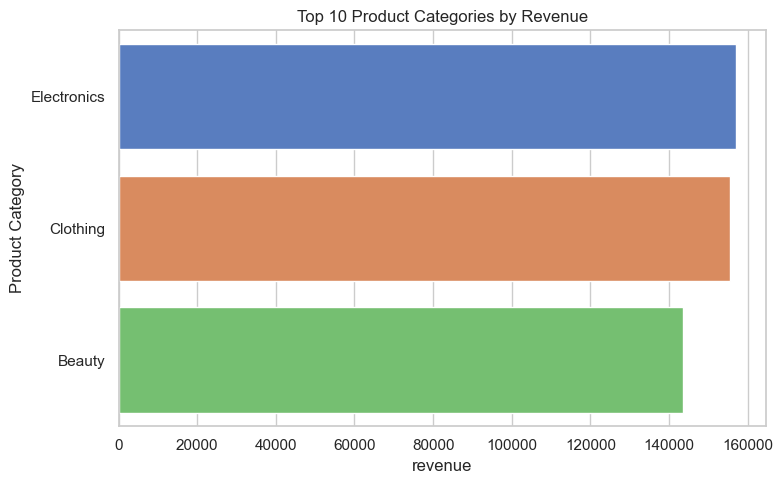

In [12]:
# top product categories
pc = df.groupby('Product Category').agg(revenue=('Total Amount','sum'), units=('Quantity','sum')).reset_index()
pc_top = pc.sort_values('revenue', ascending=False).head(10)
plt.figure(figsize=(8,5))
sns.barplot(y='Product Category', x='revenue', data=pc_top)
plt.title('Top 10 Product Categories by Revenue')
plt.tight_layout()
plt.savefig('C:/Users/Bhavana Reddy/Desktop/retail-kpi-cohort/results/charts/top_categories.png', dpi=150)
plt.show()


In [13]:
# gender and age group
gender = df.groupby('Gender').agg(revenue=('Total Amount','sum'), customers=('Customer ID','nunique')).reset_index()
print(gender)

def age_group(age):
    if age < 25: return '<25'
    if age <= 34: return '25-34'
    if age <= 44: return '35-44'
    if age <= 54: return '45-54'
    return '55+'

df['age_group'] = df['Age'].apply(age_group)
age_df = df.groupby('age_group').agg(revenue=('Total Amount','sum'), customers=('Customer ID','nunique')).reset_index()
age_df = age_df.sort_values('revenue', ascending=False)
age_df


   Gender  revenue  customers
0  Female   232840        510
1    Male   223160        490


,age_group,revenue,customers
2,45-54,97235,225
0,25-34,97090,203
1,35-44,96835,207
3,55+,90190,216
4,<25,74650,149


In [14]:
# simple t-test: revenue per order by gender 
from scipy.stats import ttest_ind

male_rev = df[df['Gender']=='Male']['Total Amount']
female_rev = df[df['Gender']=='Female']['Total Amount']

# quick check: sample sizes
print(len(male_rev), len(female_rev))

res = ttest_ind(male_rev, female_rev, equal_var=False, nan_policy='omit')
print("t-statistic:", res.statistic, "p-value:", res.pvalue)


490 510
t-statistic: -0.03159971766107415 p-value: 0.9747976108130165


In [69]:
import duckdb
import os
import re

# Paths
SQL_PATH = r"C:/Users/Bhavana Reddy/Desktop/retail-kpi-cohort/sql/queries.sql.txt"
RESULTS_DIR = r"C:/Users/Bhavana Reddy/Desktop/retail-kpi-cohort/results"
os.makedirs(RESULTS_DIR, exist_ok=True)

# Read full SQL file
with open(SQL_PATH, 'r', encoding='utf-8') as f:
    sql_text = f.read()

# Split queries by markers like "-- Q1"
pattern = r'--\s*Q\d+.*?(?=(?:\n--\s*Q\d+)|\Z)'
blocks = re.findall(pattern, sql_text, flags=re.S)

queries = []
for block in blocks:
    # Remove the leading comment line(s)
    lines = block.splitlines()
    lines = [ln for ln in lines if not ln.strip().startswith("--")]
    query = "\n".join(lines).strip()
    if query:
        queries.append(query)

print(f"Found {len(queries)} queries in file.")

# Run each query and save to separate CSV
for i, query in enumerate(queries, start=1):
    print(f"\n--- Running Q{i} ---")
    print(query)  # debug
    try:
        result = duckdb.sql(query).df()
        out_path = os.path.join(RESULTS_DIR, f"q{i}.csv")
        result.to_csv(out_path, index=False)
        print(f"✅ Q{i} saved to {out_path}")
    except Exception as e:
        print(f"❌ Q{i} failed: {e}")


Found 12 queries in file.

--- Running Q1 ---
SELECT SUM(COALESCE("Total Amount", Quantity * "Price per Unit")) AS total_revenue
FROM retail_df;
✅ Q1 saved to C:/Users/Bhavana Reddy/Desktop/retail-kpi-cohort/results\q1.csv

--- Running Q2 ---
SELECT COUNT(DISTINCT "Transaction ID") AS total_orders,
       COUNT(DISTINCT "Customer ID") AS total_customers
FROM retail_df;
✅ Q2 saved to C:/Users/Bhavana Reddy/Desktop/retail-kpi-cohort/results\q2.csv

--- Running Q3 ---
SELECT DATE_TRUNC('month', Date) AS month,
       SUM(COALESCE("Total Amount", Quantity * "Price per Unit")) AS revenue
FROM retail_df
GROUP BY month
ORDER BY month;
✅ Q3 saved to C:/Users/Bhavana Reddy/Desktop/retail-kpi-cohort/results\q3.csv

--- Running Q4 ---
SELECT CAST(Date AS DATE) AS day,
       SUM(COALESCE("Total Amount", Quantity * "Price per Unit")) AS revenue
FROM retail_df
GROUP BY day
ORDER BY day;
✅ Q4 saved to C:/Users/Bhavana Reddy/Desktop/retail-kpi-cohort/results\q4.csv

--- Running Q5 ---
SELECT "Product